In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import mysql.connector


In [105]:
# Connexion à la BD pour Wamp 
host = 'localhost'  
utilisateur = 'root'
mot_de_passe = '' 
base_de_donnees = 'ecotourisme'

# Connexion
connexion = mysql.connector.connect(
    host=host,
    user=utilisateur,
    password=mot_de_passe,
    database=base_de_donnees
)

curseur = connexion.cursor()

if connexion.is_connected():
    print("Connexion à la base de données réussie.")
else:
    print("Échec de la connexion à la base de données.")

Connexion à la base de données réussie.


## Régression linéaire : PIB par habitant vs GES par habitant

Score de performance du modèle: 0.18785410570923167


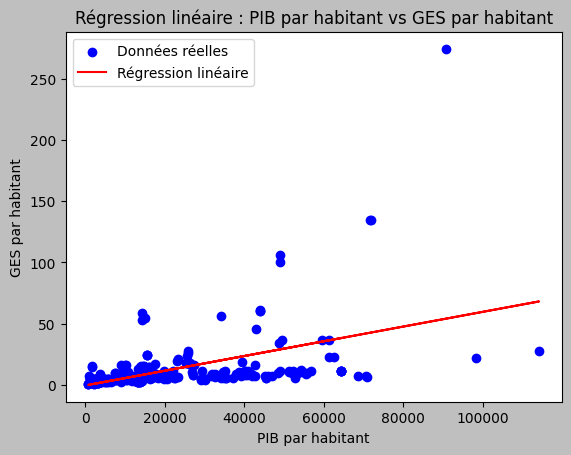

In [106]:
# Traitement des données 

curseur.execute('''
    SELECT pays.nom, economie.id_pays, economie.pibParHab, ecologie.GES_hab
    FROM economie, ecologie, pays
    WHERE economie.annee BETWEEN 2018 AND 2020 AND ecologie.annee BETWEEN 2018 AND 2020 AND economie.id_pays = ecologie.id_pays AND pays.id = ecologie.id_pays;
''')

dataset = curseur.fetchall()

df = pd.DataFrame(dataset, columns=['nom','id_pays', 'pibParHab', 'GES_hab'])


# Suppression des lignes avec des valeurs manquantes
df.dropna(inplace=True)

# Sélection des colonnes pour X (PIB) et Y (GES)
X = df[['pibParHab']]
y = df['GES_hab']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création et entraînement du modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# prédiction sur la variable y à partir de la variable test X
y_pred = model.predict(X_test)

# Évaluer le modèle : calcul de R^2
score = model.score(X_test, y_test)
print("Score de performance du modèle:", score)

# Visualisation des résultats
plt.scatter(X_test, y_test, color='blue', label='Données réelles')
plt.plot(X_test, y_pred, color='red', label='Régression linéaire')
plt.xlabel('PIB par habitant')
plt.ylabel('GES par habitant')
plt.title('Régression linéaire : PIB par habitant vs GES par habitant')
plt.legend()
plt.show()


## Régression linéaire : PIB par habitant vs IDH

Score de performance du modèle: 0.6793958348408742


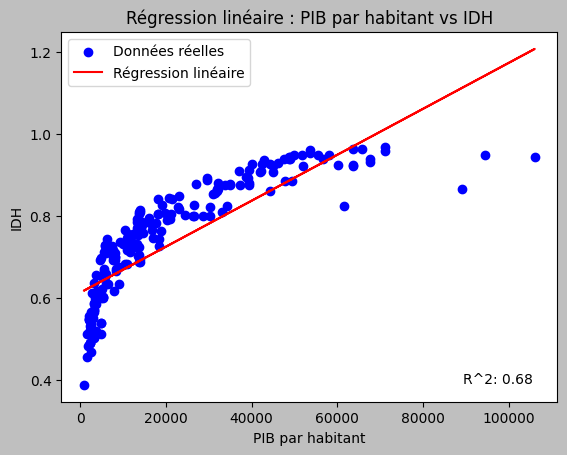

In [107]:
curseur.execute('''
    SELECT economie.id_pays, economie.pibParHab, idh.idh 
    FROM economie, idh 
    WHERE economie.annee BETWEEN 2020 AND 2022 AND idh.annee BETWEEN 2020 AND 2022 AND economie.id_pays = idh.id_pays;
''')

dataset = curseur.fetchall()

df = pd.DataFrame(dataset, columns=['id_pays', 'pibParHab', 'idh'])

# Suppression des lignes avec des valeurs manquantes
df.dropna(inplace=True)

# Sélection des colonnes pour X (PIB) et Y (IDH)
X = df[['pibParHab']]
y = df['idh']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création et entraînement du modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calcul de R^2
score = model.score(X_test, y_test)
print("Score de performance du modèle:", score)

# visualisation des résultats
plt.scatter(X_test, y_test, color='blue', label='Données réelles')
plt.plot(X_test, y_pred, color='red', label='Régression linéaire')
plt.xlabel('PIB par habitant')
plt.ylabel('IDH')
plt.title('Régression linéaire : PIB par habitant vs IDH')
plt.legend()
plt.annotate(f'R^2: {score:.2f}', xy=(0.95, 0.05), xycoords='axes fraction', fontsize=10, color='black', ha='right')
plt.show()


## Régression linéaire : énergie renouvelable vs GES par habitant

Score de performance du modèle: 0.12491170360824622


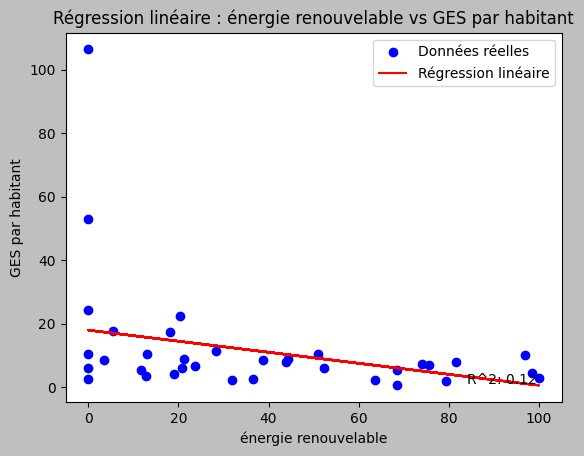

In [108]:

curseur.execute('''
    SELECT ecologie.id_pays, ecologie.GES_hab, ecologie.elecRenew FROM ecologie WHERE ecologie.annee = 2020;
''')

dataset = curseur.fetchall()

df = pd.DataFrame(dataset, columns=['id_pays', 'GES_hab', 'elecRenew'])


# Suppression des lignes avec des valeurs manquantes
df.dropna(inplace=True)

# Sélection des colonnes pour X (Energie Renouvelable) et Y (GES)
X = df[['elecRenew']]
y = df['GES_hab']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Création et entraînement du modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calcul de R^2
score = model.score(X_test, y_test)
print("Score de performance du modèle:", score)

plt.scatter(X_test, y_test, color='blue', label='Données réelles')
plt.plot(X_test, y_pred, color='red', label='Régression linéaire')
plt.xlabel('énergie renouvelable')
plt.ylabel('GES par habitant')
plt.title('Régression linéaire : énergie renouvelable vs GES par habitant')
plt.legend()
plt.annotate(f'R^2: {score:.2f}', xy=(0.95, 0.05), xycoords='axes fraction', fontsize=10, color='black', ha='right')
plt.show()



## Régression linéaire : PIB par habitant vs RNB par habitant

Score de performance du modèle: 0.9811558881919791


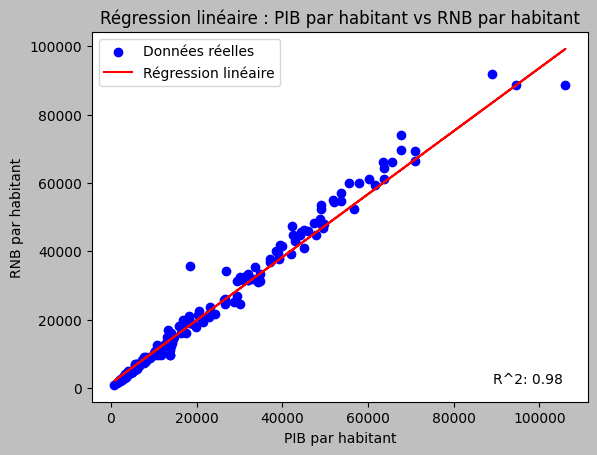

In [109]:

curseur.execute('''
    SELECT idh.id_pays, idh.rnb, economie.pibParHab 
    FROM idh, economie 
    WHERE economie.annee BETWEEN 2020 AND 2022 AND idh.annee BETWEEN 2020 AND 2022 AND economie.id_pays = idh.id_pays;
''')

dataset = curseur.fetchall()

df = pd.DataFrame(dataset, columns=['id_pays', 'rnb', 'pibParHab'])


# Suppression des lignes avec des valeurs manquantes
df.dropna(inplace=True)

# Sélection des colonnes pour X (PIB) et Y (RNB)
X = df[['pibParHab']]
y = df['rnb']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Création et entraînement du modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calcul de R^2
score = model.score(X_test, y_test)
print("Score de performance du modèle:", score)

# Visualisation des résultats
plt.scatter(X_test, y_test, color='blue', label='Données réelles')
plt.plot(X_test, y_pred, color='red', label='Régression linéaire')
plt.xlabel('PIB par habitant')
plt.ylabel('RNB par habitant')
plt.title('Régression linéaire : PIB par habitant vs RNB par habitant')
plt.legend()
plt.annotate(f'R^2: {score:.2f}', xy=(0.95, 0.05), xycoords='axes fraction', fontsize=10, color='black', ha='right')
plt.show()


## Régression linéaire : IDH vs Espérance de vie

Score de performance du modèle: 0.7940912941827533


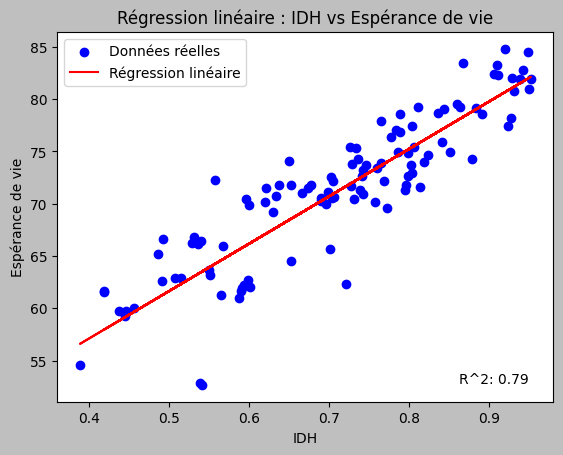

In [110]:

curseur.execute('''
    SELECT idh.id_pays, idh.idh, idh.life FROM idh WHERE idh.annee >= 2020;
''')

dataset = curseur.fetchall()

df = pd.DataFrame(dataset, columns=['id_pays', 'idh', 'life'])


# Suppression des lignes avec des valeurs manquantes
df.dropna(inplace=True)

# Sélection des colonnes pour X (IDH) et Y (espérance de vie)
X = df[['idh']]
y = df['life']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création et entraînement du modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calcul de R^2
score = model.score(X_test, y_test)
print("Score de performance du modèle:", score)

# Visualisation des résultats
plt.scatter(X_test, y_test, color='blue', label='Données réelles')
plt.plot(X_test, y_pred, color='red', label='Régression linéaire')
plt.xlabel('IDH')
plt.ylabel('Espérance de vie')
plt.title('Régression linéaire : IDH vs Espérance de vie')
plt.legend()
plt.annotate(f'R^2: {score:.2f}', xy=(0.95, 0.05), xycoords='axes fraction', fontsize=10, color='black', ha='right')
plt.show()


## Régression linéaire : IDH vs GPI

Score de performance du modèle: 0.3758096632486202


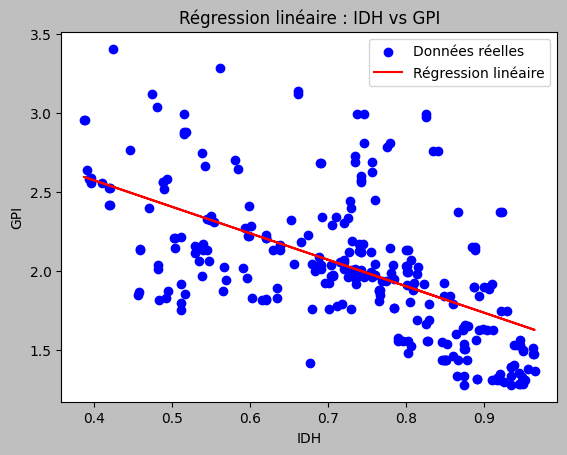

In [111]:

curseur.execute('''
    SELECT idh.id_pays, idh.idh, surete.gpi 
    FROM idh, surete 
    WHERE surete.annee BETWEEN 2020 AND 2022 AND idh.annee BETWEEN 2020 AND 2022 AND surete.id_pays = idh.id_pays;
''')

dataset = curseur.fetchall()

df = pd.DataFrame(dataset, columns=['id_pays', 'idh', 'gpi'])


# Suppression des lignes avec des valeurs manquantes
df.dropna(inplace=True)

# Sélection des colonnes pour X (IDH) et Y (GPI)
X = df[['idh']]
y = df['gpi']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Création et entraînement du modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calcul de R^2
score = model.score(X_test, y_test)
print("Score de performance du modèle:", score)

# Visualisation des résultats
plt.scatter(X_test, y_test, color='blue', label='Données réelles')
plt.plot(X_test, y_pred, color='red', label='Régression linéaire')
plt.xlabel('IDH')
plt.ylabel('GPI')
plt.title('Régression linéaire : IDH vs GPI')
plt.legend()
plt.show()
